In [1]:
import concurrent.futures
import pyaudio
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.io.wavfile import write

In [2]:
class Aud_Vid():

    def __init__(self): #, arg
        self.video = cv2.VideoCapture(0)
        self.CHUNK = 1470
        self.FORMAT = pyaudio.paInt16
        self.CHANNELS = 1 #2
        self.RATE = 44100
        self.audio = pyaudio.PyAudio()
        self.instream = self.audio.open(format=self.FORMAT,channels=self.CHANNELS,rate=self.RATE,input=True,frames_per_buffer=self.CHUNK)
        self.outstream = self.audio.open(format=self.FORMAT,channels=self.CHANNELS,rate=self.RATE,output=True,frames_per_buffer=self.CHUNK)
        print(self.video.get(cv2.CAP_PROP_FRAME_WIDTH))
        # 640.0
        
        print(self.video.get(cv2.CAP_PROP_FRAME_HEIGHT))
        # 360.0
        
        print(self.video.get(cv2.CAP_PROP_FPS))
        # 29.97002997002997
        
        print(self.video.get(cv2.CAP_PROP_FRAME_COUNT))
        # 360.0


    def sync(self):
          with concurrent.futures.ThreadPoolExecutor() as executor:
                  tv = executor.submit(self.video.read) 
                  ta = executor.submit(self.instream.read,1470)
                  vid = tv.result()
                  aud = ta.result()
                  return(vid[1].tobytes(),aud)

In [6]:
# record 10 seconds of video at 30Hz 
import scipy as cp
aa = []
bb = []
av = Aud_Vid()
rts = []
for i in range(0,300):
    st = time.time()
    (a,b) = av.sync()
    sig = np.frombuffer(b, dtype='<i2').reshape(-1, 1)
    f,t,spect = cp.signal.spectrogram(sig, fs=44100.0)
    #et = time.time()

# get the execution time
    #elapsed_time = et - st
    rts.append(st)
    aa.append(a)
    bb.append(b)
st = time.time()
rts.append(st)

1920.0
1080.0
1.0
0.0


/var/folders/q0/rhzg1zx972dfvlgtr5qg3p9h0000gp/T/ipykernel_8848/3975190861.py:11: UserWarning: nperseg = 256 is greater than input length  = 1, using nperseg = 1
  f,t,spect = cp.signal.spectrogram(sig, fs=44100.0)


29.881138823450964


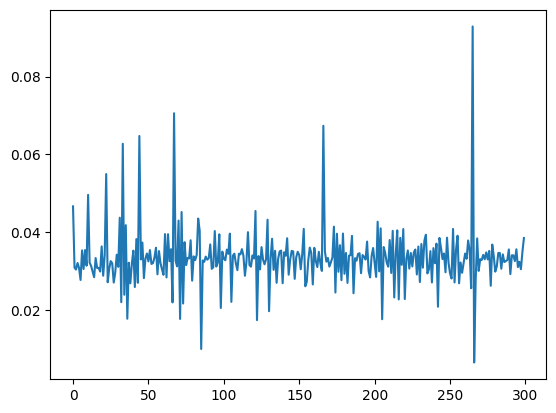

In [13]:
plt.figure()
plt.plot(np.diff(np.array(rts).reshape(-1)))
print(1/np.mean(np.diff(np.array(rts).reshape(-1))))

29.93326379385255


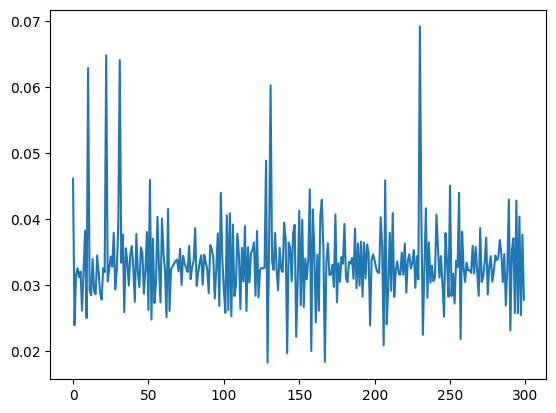

In [7]:
plt.figure()
plt.plot(np.diff(np.array(rts).reshape(-1)))
print(1/np.mean(np.diff(np.array(rts).reshape(-1))))

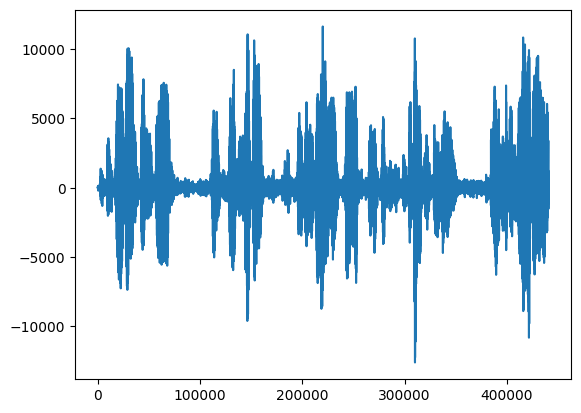

In [4]:
# write audio data
bbx = [np.frombuffer(bx, dtype='<i2').reshape(-1, 1) for bx in bb]
data = np.array(bbx).reshape(-1,1)
plt.figure()
plt.plot(data)
plt.show()
write("example.wav", 44100, data.astype(np.int16))

In [5]:
#output = cv2.VideoWriter( 
#        "output.avi", cv2.VideoWriter_fourcc(*'MPEG'), 30, (1080, 1920))
# write video data
fourcc = cv2.VideoWriter_fourcc(*'XVID') #XVID
fps = 30
frame_width = 1920
frame_height = 1080
output = cv2.VideoWriter('output.mp4', fourcc, fps, (frame_width, frame_height))
for ai in aa:
    sig = np.frombuffer(ai, dtype='B').reshape(1080,1920,3)
    output.write(sig)

output.release()

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [157]:
sig = np.frombuffer(b, dtype='<i2').reshape(-1, 1)

TypeError: Image data of dtype |S6220800 cannot be converted to float

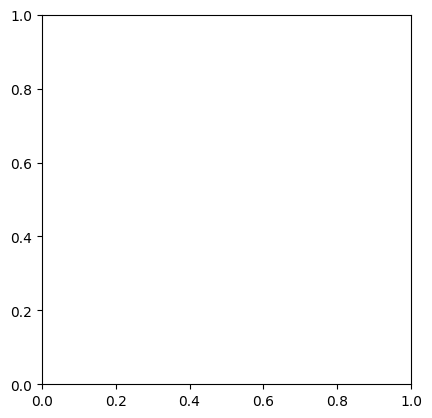

In [215]:
plt.figure()
plt.imshow(ai)
plt.show()

In [ ]:
#data_ints = np.array(struct.unpack('<' + 'B'*len(a), aa[9])).reshape(1080,1920,3)
sig = np.frombuffer(aa[20], dtype='B').reshape(1080,1920,3)
plt.figure()
plt.imshow(sig)
plt.show()

In [8]:
f

array([0.])